### Project - AllLife Credit Card Customer Segmentation

Objective To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

Data Description:Data is of various customers of a bank with their credit limit, the total number of credit cards  the  customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre
    
#### Domain 
Banking

#### 1. Univariate analysis

In [148]:
# Imporing the necessary Libraries

import warnings
warnings.filterwarnings('ignore') #Exception Handling

In [149]:
import pandas as pd             #Data Manipulation and Analysis
import numpy as np              #It has functions for working in domain of linear algebra, fourier transform, and matrices.
import matplotlib.pyplot as plt #It is used for creating static, animated, and interactive visualizations.
%matplotlib inline              
import seaborn as sns           #It is used for making statistical graphics.

In [150]:
import pandas as pd             #Data Manipulation and Analysis
import numpy as np              #It has functions for working in domain of linear algebra, fourier transform, and matrices.
import matplotlib.pyplot as plt #It is used for creating static, animated, and interactive visualizations.
%matplotlib inline              
import seaborn as sns           #It is used for making statistical graphics.

In [151]:
DF = pd.read_excel('Credit Card Customer Data.xlsx')   #Reading the dataset into dataframe 

In [152]:
# Applying info, shape, describe, and find the number of missing values in the data

print(DF.info())
print()
print(DF.shape)
print()
print(DF.describe().T)
print()
print(DF.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None

(660, 7)

                     count          mean           std      min       25%  \
Sl_No                660.0    330.500000    190.669872      1.0    165.75   
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660

In [153]:
DF.describe().transpose()  # Data Distribution Summary

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [154]:
# Data Distribution Summary


# Customer Key: mean is slightly higher than median...Q3 and Max differnece is very large compared to Q1 and Min difference...
# Avg_Credit_Limit: data is skewed toward right side and might have upper side outliers
# Total_Credit_Cards: median is slightly higher than mean.
# Total_visits_bank: mean is slightly higher than median.
# Total_visits_online: mean is slightly higher than median
# Total_calls_made: mean is slightly higher than median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB6640D1C8>,
      dtype=object)

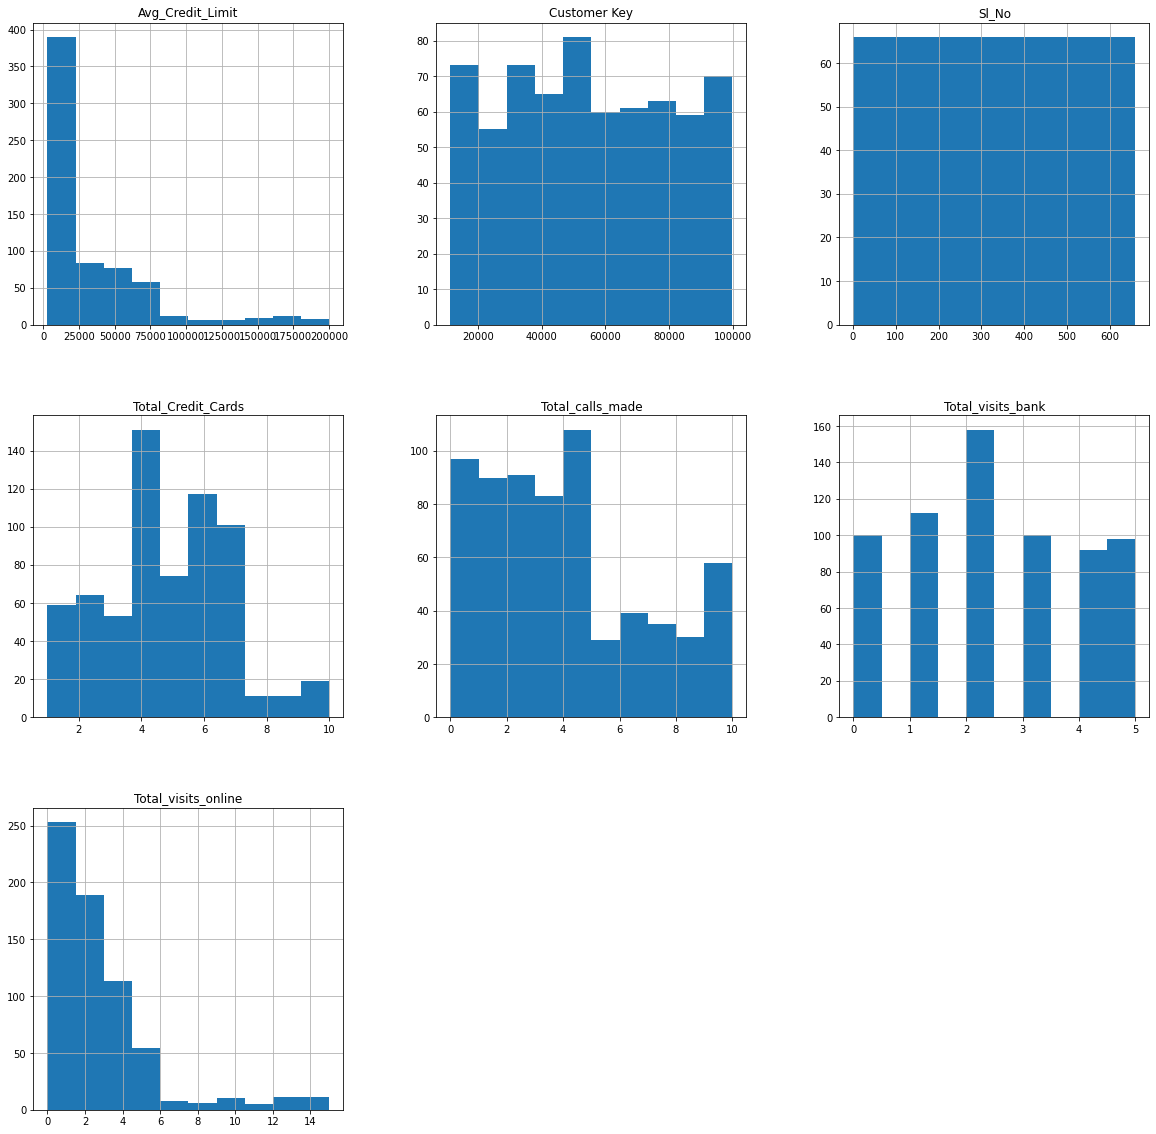

In [155]:
# performing univariant analysis by generating histogram of all dimensions
DF.hist(figsize = [20,20])

Sl_No                     AxesSubplot(0.125,0.125;0.0945122x0.755)
Customer Key           AxesSubplot(0.238415,0.125;0.0945122x0.755)
Avg_Credit_Limit       AxesSubplot(0.351829,0.125;0.0945122x0.755)
Total_Credit_Cards     AxesSubplot(0.465244,0.125;0.0945122x0.755)
Total_visits_bank      AxesSubplot(0.578659,0.125;0.0945122x0.755)
Total_visits_online    AxesSubplot(0.692073,0.125;0.0945122x0.755)
Total_calls_made       AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

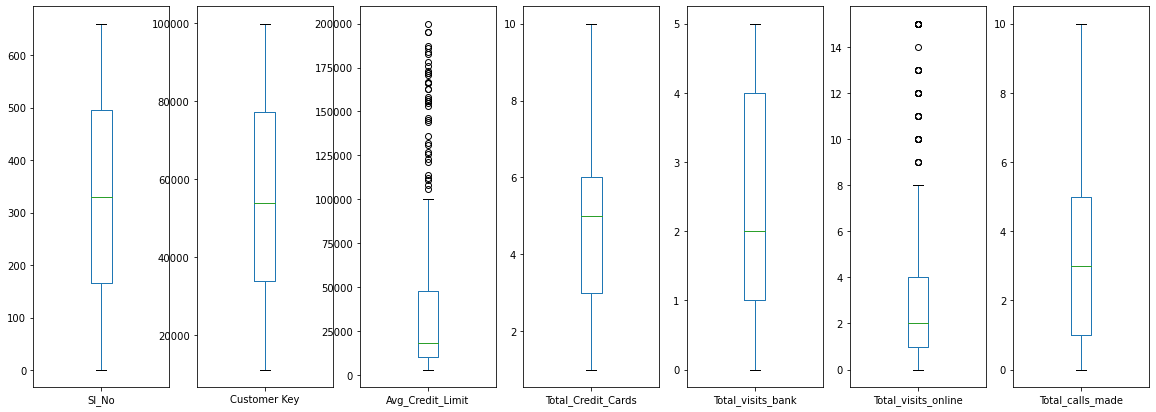

In [156]:
# plotting box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
DF.plot(kind="box",subplots = True, ax=ax)

In [157]:
#Outlier Treatment
# handling outlier for Avg_Credit_Limit feature
Avg_Credit_Limit_q3 = DF["Avg_Credit_Limit"].quantile(0.75)
Avg_Credit_Limit_q1 = DF["Avg_Credit_Limit"].quantile(0.25)
Avg_Credit_Limit_iqr = Avg_Credit_Limit_q3-Avg_Credit_Limit_q1 # find out iqr for Mortgage feature
print("Avg_Credit_Limit_iqr:",Avg_Credit_Limit_iqr)
upper_cutoff = Avg_Credit_Limit_q3+ 1.5*Avg_Credit_Limit_iqr
lower_cutoff = Avg_Credit_Limit_q1-1.5*Avg_Credit_Limit_iqr
print("age_upper cutoff:",upper_cutoff)
print("age_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for slag feature
DF["Avg_Credit_Limit"] = DF["Avg_Credit_Limit"].where(DF["Avg_Credit_Limit"]<upper_cutoff,upper_cutoff)



# handling outlier for Total_visits_online feature
Total_visits_online_q3 = DF["Total_visits_online"].quantile(0.75)
Total_visits_online_q1 = DF["Total_visits_online"].quantile(0.25)
Total_visits_online_iqr = Total_visits_online_q3-Total_visits_online_q1 # find out iqr for Mortgage feature
print("Total_visits_online_iqr:",Total_visits_online_iqr)
upper_cutoff = Total_visits_online_q3+ 1.5*Total_visits_online_iqr
lower_cutoff = Total_visits_online_q1-1.5*Total_visits_online_iqr
print("age_upper cutoff:",upper_cutoff)
print("age_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for slag feature
DF["Total_visits_online"] = DF["Total_visits_online"].where(DF["Total_visits_online"]<upper_cutoff,upper_cutoff)

Avg_Credit_Limit_iqr: 38000.0
age_upper cutoff: 105000.0
age_lower cutoff: -47000.0
Total_visits_online_iqr: 3.0
age_upper cutoff: 8.5
age_lower cutoff: -3.5


Sl_No                     AxesSubplot(0.125,0.125;0.0945122x0.755)
Customer Key           AxesSubplot(0.238415,0.125;0.0945122x0.755)
Avg_Credit_Limit       AxesSubplot(0.351829,0.125;0.0945122x0.755)
Total_Credit_Cards     AxesSubplot(0.465244,0.125;0.0945122x0.755)
Total_visits_bank      AxesSubplot(0.578659,0.125;0.0945122x0.755)
Total_visits_online    AxesSubplot(0.692073,0.125;0.0945122x0.755)
Total_calls_made       AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

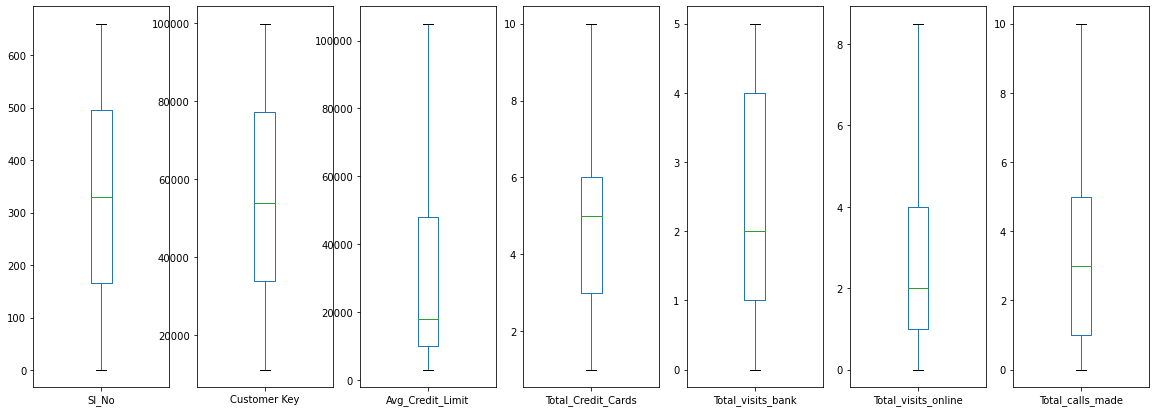

In [158]:
# Checking Outliers again after Treatment
fig, ax = plt.subplots(figsize=(20,7))
DF.plot(kind="box",subplots = True, ax=ax)

In [159]:
# Cheking for duplicate data in a given DataFrame
DF.duplicated().sum()

0

#### Bi Variate or Multivariate analysis

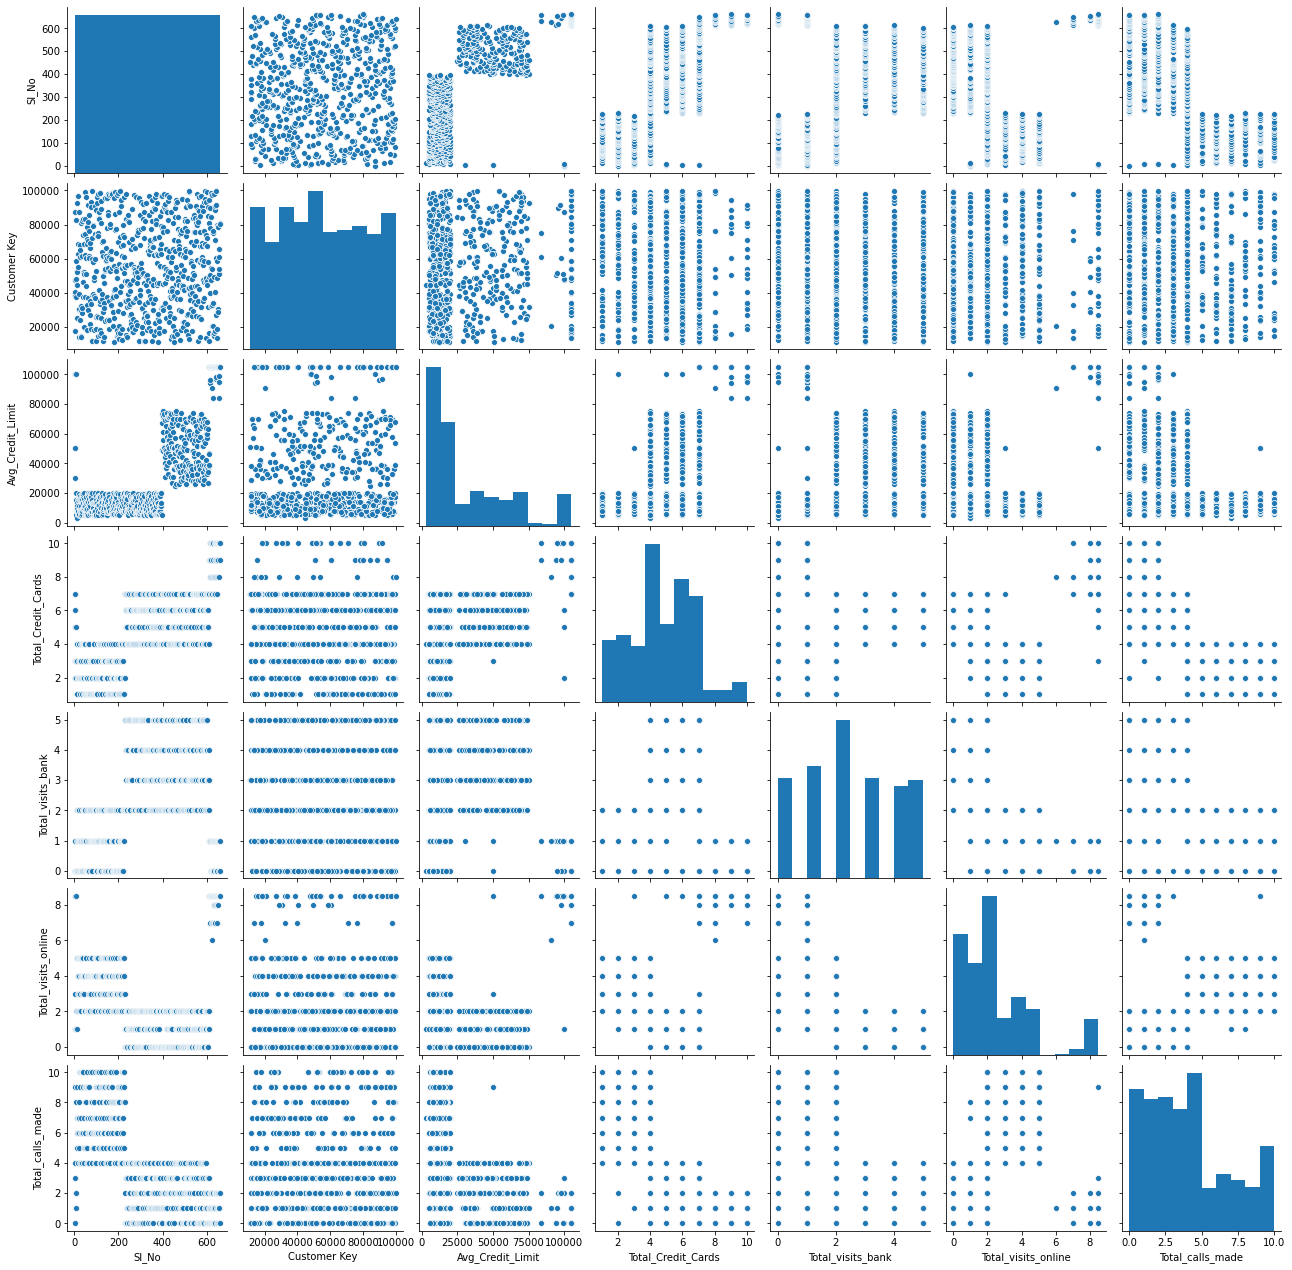

In [160]:
%matplotlib inline
sns.pairplot(DF)

In [161]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=8):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

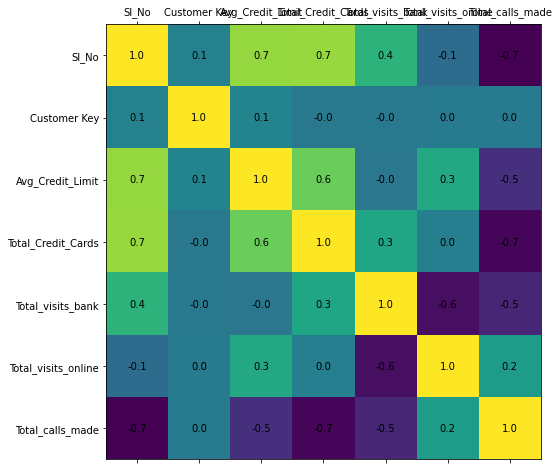

In [162]:
plot_corr(DF)

In [163]:
# We can Drop following columns as they are not required.

DF.drop(['Sl_No','Total_calls_made','Total_visits_online'], axis=1, inplace = True)

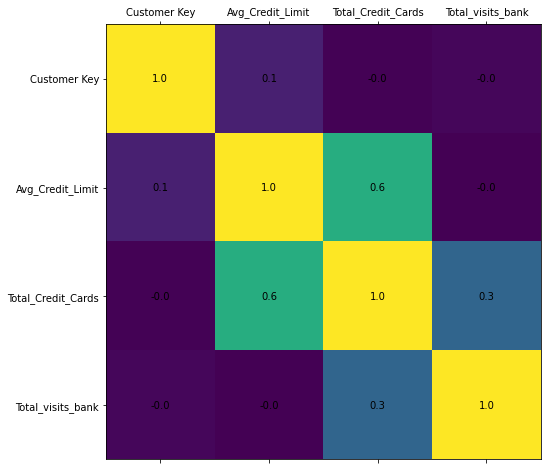

In [164]:
plot_corr(DF)

cdist: Compute distance between each pair of the two collections of inputs.

#### Execute K-meansclustering use  elbow  plot and  analyse  clusters  using  boxplot

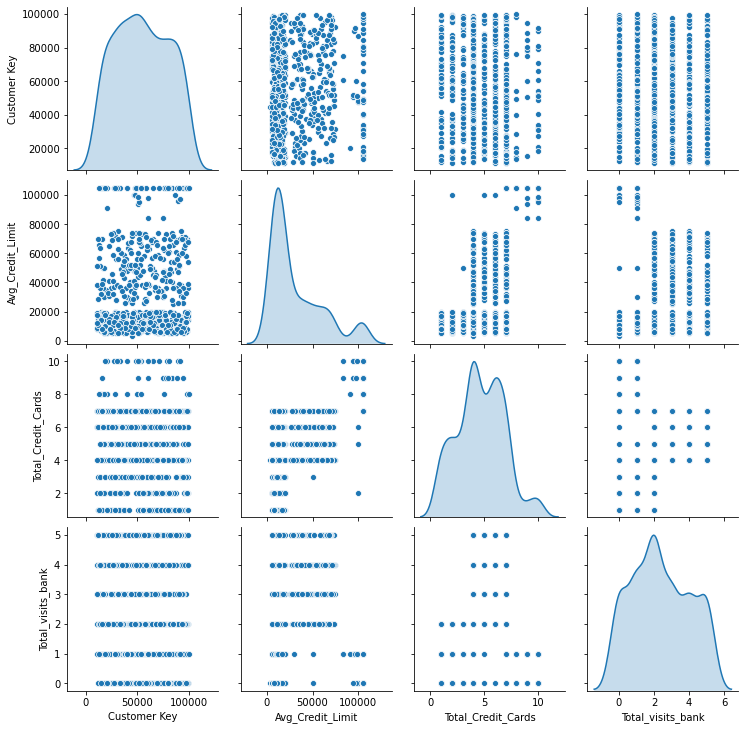

In [165]:
import seaborn as sns
sns.pairplot(DF, diag_kind='kde') 

#### KMeans Clustering. Elbow Plot and Analysing Clusters using Box Plot

In [166]:
 ##Based on the kde plots, we can work with 2 or 3 clusters

In [167]:
##Scale the data
from scipy.stats import zscore

DF_z = DF.apply(zscore)

In [168]:
DF_z.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank
0,1.246920,2.398942,-1.249225,-0.860451
1,-0.653203,0.643619,-0.787585,-1.473731
2,-1.476098,0.643619,1.058973,-0.860451
3,-0.571901,-0.058511,0.135694,-0.860451
4,-0.300857,2.398942,0.597334,-1.473731


cdist: Compute distance between each pair of the two collections of inputs.

In [169]:
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

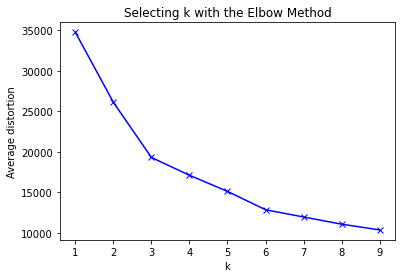

In [170]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(DF)
    prediction=model.predict(DF)
    meanDistortions.append(sum(np.min(cdist(DF, model.cluster_centers_, 'euclidean'), axis=1)) / DF
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

n_init= Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.

In [171]:
print('From the elbow plot, the optimal value of k is equal to 3')

From the elbow plot, the optimal value of k is equal to 3


Clustering the data using 3 clusters

In [172]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = kmeans.fit(DF_z)
labels = kmeans.predict(DF_z)

Printing the centroids

In [173]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids,columns=DF_z.columns)
centroids_df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank
0,-0.029072,0.074114,0.389596,0.735781
1,-0.004433,-0.681104,-0.994461,-0.857906
2,0.195498,2.329919,1.684925,-0.985186


Visualising the 3 clusters by plotting 'Avg_Credit_Limit' vs 'Total_Credit_Cards'

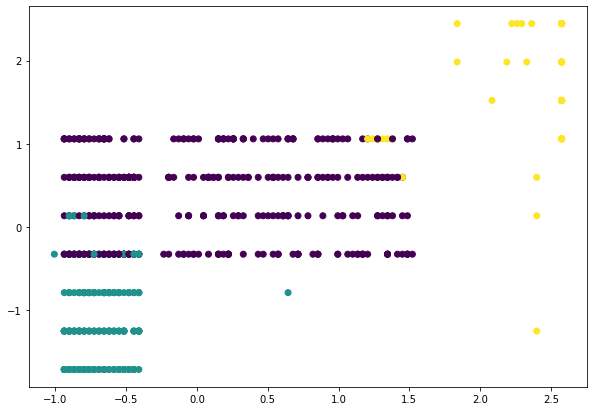

In [174]:
plt.figure(figsize=(10, 7))  
plt.scatter(DF_z['Avg_Credit_Limit'], DF_z['Total_Credit_Cards'], c=kmeans.labels_)

Getting counts for each cluster

In [175]:
DF_z['label'] = kmeans.labels_
pd.value_counts(DF_z['label'])

0    360
1    241
2     59
Name: label, dtype: int64

Use linear regression model on different clusters separately and print the coefficients of the models individually

In [176]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

X = DF_z.drop(columns= 'label', axis= 1)  # Creating Independent variable 
y = DF_z['label'] # creating Dependent variable 

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (660, 4)
dependent variable data shape  (660,)


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # spliting Test_Train data 

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (528, 4)
y_train set shape   (528,)
X_test set shape   (132, 4)
X_test set shape   (132,)


In [178]:
regressor = LinearRegression()  # Instanciating Linear regrassion object 
regressor.fit(X_train, y_train) # fitting our data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
# Creating dataframe for coefficient and coulumns 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])    
coeff_df

,Coefficient
Customer Key,0.025371
Avg_Credit_Limit,0.155160
Total_Credit_Cards,-0.022920
Total_visits_bank,-0.474425


In [180]:
y_pred = regressor.predict(X_test) # predict the data from our test set

In [181]:
# creating DataFrame from Predicted and Actual
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ytrue_ypred.head()

,Actual,Predicted
541,0,-0.082419
103,1,1.201923
14,1,0.566854
526,1,0.661257
298,0,-0.344902



Mean Absolute Error The mean absolute error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. Effectively, MAE describes the typical magnitude of the residuals

Mean Square Error The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value

Root Mean Squared Error (RMSE). As the name suggests, it is the square root of the MSE. Because the MSE is squared, its units do not match that of the original output. Researchers will often use RMSE to convert the error metric back into similar units, making interpretation easier

If is the estimated target output, the corresponding (correct) target output, and is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

e x p l a i n e d _ v a r i a n c e ( y , y ^ ) = 1 - ( V a r { y − y ^ }/ V a r { y })

The best possible score is 1.0, lower values are worse.

In [182]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error : 0.32960117340360573
Mean Squared Error: 0.15824777716222252
Root Mean Squared Error: 0.3978036917403137
explained_variance_score: 0.6450283443980389


Evaluation Matrix we observed Here is not good MAE,MSE and RMSE needs to be as low as posible and Explained Varience score shoud be as High as posible.

In [183]:
df_0 = DF_z.groupby('label').get_group(0) # Making seprate DataFarme for cluster lable "0"
df_0.shape  # checking shape for cross conforming

(360, 5)

In [184]:
df_1 = DF_z.groupby('label').get_group(1)  # Making seprate DataFarme for cluster lable "1"
df_1.shape  # checking shape for cross conforming

(241, 5)

In [185]:
df_2 = DF_z.groupby('label').get_group(2)  # Making seprate DataFarme for cluster lable "1"
df_2.shape   # checking shape for cross conforming

(59, 5)

In [186]:
# counting number of points in each cluster
DF_z["label"].value_counts()  # for cross check

0    360
1    241
2     59
Name: label, dtype: int64

#### linear regression model with df_0

In [187]:
# using one vs all strategy
df_1_2 = pd.concat([df_1,df_2],ignore_index=True) # concatinating cluters belonging to lable 1 and 2
df_1_2['label'] = df_1_2['label'].replace(to_replace = 2 , value = 1)  # replacing all labels of culster 2 to 1 
df_1_2_0 = pd.concat([df_0,df_1_2],ignore_index=True)#concatination cluster labled with 0 with two cluster whose lable is now 1
df_1_2_0.shape  # cross checking shape of new DataFrame with that of original DataFrame

(660, 5)

In [188]:
X = df_1_2_0.drop(columns= 'label', axis= 1)
y = df_1_2_0['label']

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (660, 4)
dependent variable data shape  (660,)


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (528, 4)
y_train set shape   (528,)
X_test set shape   (132, 4)
X_test set shape   (132,)


In [190]:
regressor_0 = LinearRegression()  # creating an object 
regressor_0.fit(X_train, y_train) # fitting our data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
# Creating data frame for our coefficient 
coeff_df_0 = pd.DataFrame(regressor_0.coef_, X.columns, columns=['Coefficient'])  
coeff_df_0

,Coefficient
Customer Key,0.018323
Avg_Credit_Limit,0.017700
Total_Credit_Cards,-0.112754
Total_visits_bank,-0.357747


In [192]:
y_pred = regressor_0.predict(X_test) # predict the data

In [193]:
# creating data frame for actual value and predicted value 
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
ytrue_ypred.head(10)

,Actual,Predicted
541,1,1.088052
103,0,0.492610
14,0,0.326212
526,1,0.913607
298,0,-0.209804
162,0,0.298523
592,1,0.528617
474,1,0.859040
547,1,0.879630
620,1,0.729912


In [194]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.2227260746424587
Mean Squared Error: 0.07470093539997055
Root Mean Squared Error: 0.27331471859373135
explained_variance_score: 0.7040967121529006


#### linear regression model with df_1

In [195]:
# using one vs all strategy
df_0_2 = pd.concat([df_0,df_2],ignore_index=True) # concatinating cluters belonging to lable 0 and 2
df_0_2['label'] = df_0_2['label'].replace(to_replace = 0 , value = 2)  # replacing all labels of culster 0 to 2 
df_0_2_1 = pd.concat([df_1,df_0_2],ignore_index=True)#concatination cluster labled with 1 with two cluster whose lable is now 2
df_0_2_1.shape  # cross checking shape of new DataFrame with that of original DataFrame

(660, 5)

In [196]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

X = df_0_2_1.drop(columns= 'label', axis= 1)
y = df_0_2_1['label']

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (660, 4)
dependent variable data shape  (660,)


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (528, 4)
y_train set shape   (528,)
X_test set shape   (132, 4)
X_test set shape   (132,)


In [198]:
regressor_1 = LinearRegression()  
regressor_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
# creating data frame for our coefficients 
coeff_df = pd.DataFrame(regressor_1.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Customer Key,-0.001769
Avg_Credit_Limit,0.131763
Total_Credit_Cards,0.206689
Total_visits_bank,0.244878


In [200]:
y_pred = regressor_1.predict(X_test) # predict the data

In [201]:
# data frame for our actual and predicted values 
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ytrue_ypred.head()

,Actual,Predicted
541,2,1.825654
103,1,1.197684
14,1,1.227901
526,2,1.948595
298,2,1.739370


In [202]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.1827036125261382
Mean Squared Error: 0.04893439301584833
Root Mean Squared Error: 0.22121119550295895
explained_variance_score: 0.7927864650904799


#### linear regression model with df_2

In [203]:
# using one vs all strategy
df_0_1 = pd.concat([df_0,df_1],ignore_index=True) # concatinating cluters belonging to lable 0 and 1
df_0_1['label'] = df_0_1['label'].replace(to_replace = 0 , value = 1)  # replacing all labels of culster 0 to 1 
df_0_1_2 = pd.concat([df_2,df_0_1],ignore_index=True)#concatination cluster labled with 2 with two cluster whose lable is now 1
df_0_1_2.shape  # cross checking shape of new DataFrame with that of original DataFrame

(660, 5)

In [204]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

X = df_0_1_2.drop(columns= 'label', axis= 1)
y = df_0_1_2['label']

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (660, 4)
dependent variable data shape  (660,)


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (528, 4)
y_train set shape   (528,)
X_test set shape   (132, 4)
X_test set shape   (132,)


In [206]:
regressor_2 = LinearRegression()  
regressor_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
# creating data frame frou our coefficients
coeff_df = pd.DataFrame(regressor_2.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Customer Key,0.008078
Avg_Credit_Limit,0.140689
Total_Credit_Cards,0.092824
Total_visits_bank,-0.113817


In [208]:
y_pred = regressor_2.predict(X_test) # predict the data

In [209]:
# Dataframe for acual and predicted value
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ytrue_ypred.head()

,Actual,Predicted
541,1,1.092113
103,1,0.799760
14,2,1.738323
526,1,1.050512
298,1,1.098777


In [210]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.12300513481527518
Mean Squared Error: 0.02735190105636915
Root Mean Squared Error: 0.16538410158285818
explained_variance_score: 0.7445614463046193


K - Means Clustering

In [211]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [212]:
#Assign a dummy array called Cluster_error
cluster_error = []

In [213]:

# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6

#cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(DF_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_error.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2921.725758
1,2,2010.185492
2,3,1313.359493
3,4,1044.062657
4,5,870.101868
5,6,773.759983
6,7,706.548373
7,8,657.855736
8,9,606.475328


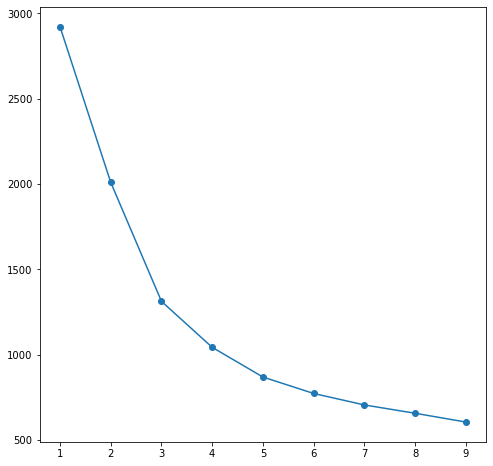

In [214]:
#Plotting Elbow/ Scree Plot
plt.figure(figsize=(8,8))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

1. we select that value of k where the gradiant reduces drastically
2. here in the elbow curve we can obsever that gradiant from k= 3 to k= 4 is changing at higher rate so in this k we will go with k= 3
3. k= 3 we will select

#### Using optimal value of K - Cluster the data

In [215]:
cluster = KMeans( n_clusters = 3, init='k-means++' )
cluster.fit(DF_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [216]:
# kmeans.cluster_centers_ function to pull the centroid information from the instance

centroids = cluster.cluster_centers_
centroids


array([[ 1.95497549e-01,  2.32991886e+00,  1.68492530e+00,
        -9.85185573e-01,  2.00000000e+00],
       [-2.90719867e-02,  7.41136471e-02,  3.89595852e-01,
         7.35781306e-01,  2.77555756e-15],
       [-4.43336166e-03, -6.81104255e-01, -9.94460993e-01,
        -8.57905897e-01,  1.00000000e+00]])

In [217]:
# Store the centroids in a dataframe with column names from the original dataset given

centroid_df = pd.DataFrame(centroids, columns = list(DF_z) )
centroid_df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,label
0,0.195498,2.329919,1.684925,-0.985186,2.000000e+00
1,-0.029072,0.074114,0.389596,0.735781,2.775558e-15
2,-0.004433,-0.681104,-0.994461,-0.857906,1.000000e+00


#### visualisation of our cluster

In [218]:
labels=cluster.predict(DF_z)
DF_z = pd.DataFrame(DF_z)
DF_z["label"] = labels

In [219]:
# counting number of points in each cluster
DF_z["label"].value_counts()

1    360
2    241
0     59
Name: label, dtype: int64

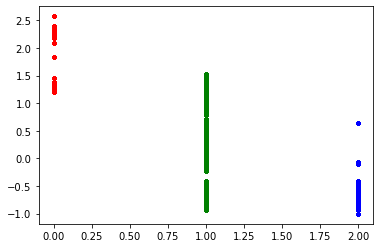

In [220]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(DF_z.loc[DF_z['label'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 4], points[:, 1], s=7, c=colors[i])

#### Use kmeans.labels_ function to print out the labels of the classes

In [221]:
cluster.labels_

array([0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

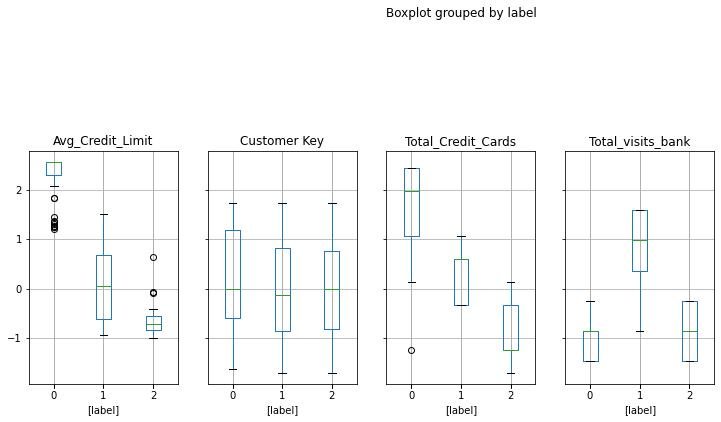

In [222]:
import matplotlib.pylab as plt
DF_z.boxplot(by = 'label',  layout=(5,5), figsize=(15, 25));

#### Using linear regression model on different clusters separately and print the coefficients of the models individually

In [223]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 

X = DF_z.drop(columns= 'label', axis= 1)
y = DF_z['label']

print ('Independent variable data shape ', X.shape)
print ('dependent variable data shape ', y.shape)

Independent variable data shape  (660, 4)
dependent variable data shape  (660,)


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X_train set shape  ', X_train.shape)
print ('y_train set shape  ', y_train.shape)
print ('X_test set shape  ', X_test.shape)
print ('X_test set shape  ', y_test.shape)

X_train set shape   (528, 4)
y_train set shape   (528,)
X_test set shape   (132, 4)
X_test set shape   (132,)


In [225]:
regressor_drop_yr = LinearRegression()  
regressor_drop_yr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [226]:
coeff_df = pd.DataFrame(regressor_drop_yr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Customer Key,-0.005479
Avg_Credit_Limit,-0.287941
Total_Credit_Cards,-0.293017
Total_visits_bank,-0.143482


In [227]:
y_pred = regressor_drop_yr.predict(X_test) # predict the data

In [228]:
ytrue_ypred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ytrue_ypred.head()

,Actual,Predicted
541,1,0.448790
103,2,2.170707
14,2,1.931169
526,2,1.430234
298,1,1.071776


In [229]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('explained_variance_score:' , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.19660125314270427
Mean Squared Error: 0.06061075178071847
Root Mean Squared Error: 0.24619250959506966
explained_variance_score: 0.8428224926680123


#### Hierarchical clustering

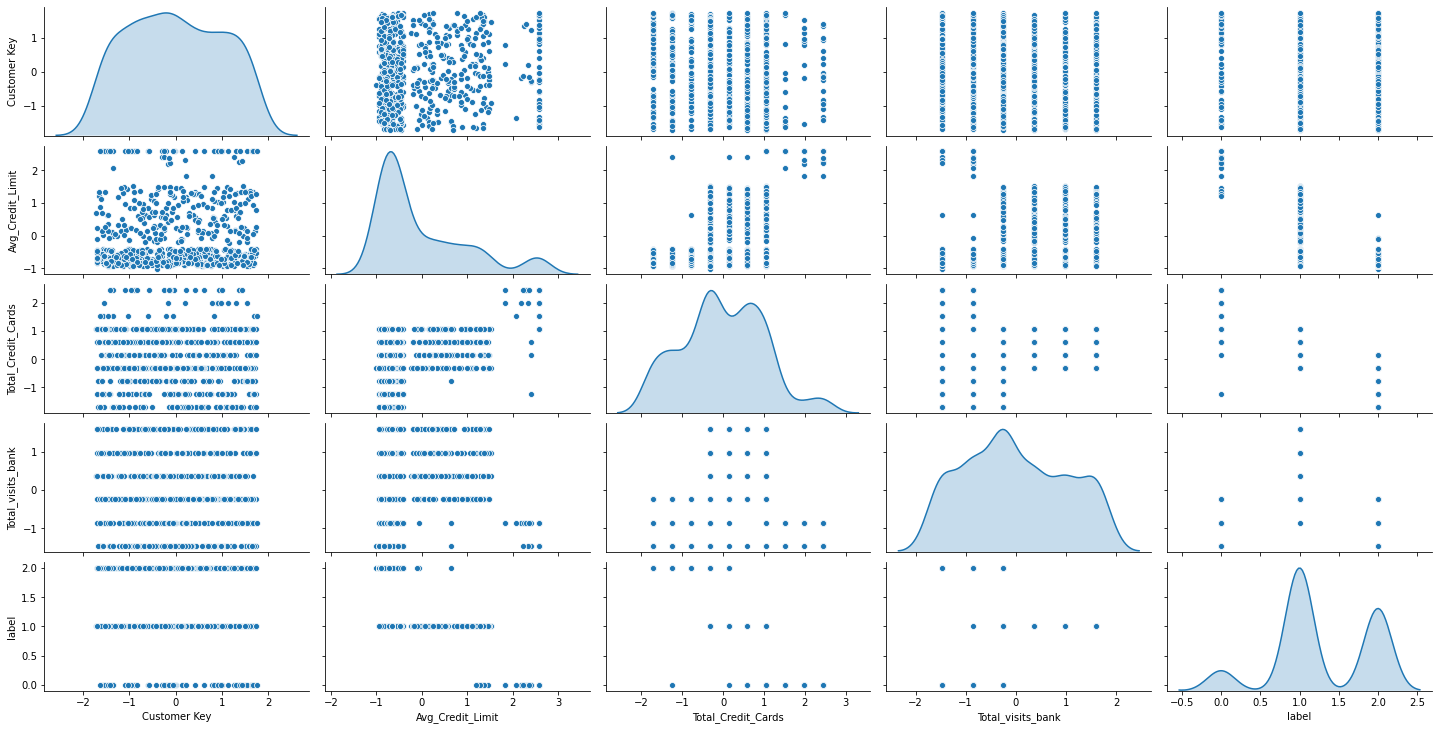

In [230]:
#importing seaborn for statistical plots
sns.pairplot(DF_z, height=2,aspect=2 , diag_kind='kde')

In [246]:
from sklearn.cluster import AgglomerativeClustering 

In [247]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [248]:
model.fit(DF_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [249]:
DF['labels'] = model.labels_
DF.head(10)

#custDataAttr.groupby(["labels"]).count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,labels
0,87073,100000,2,1,2
1,38414,50000,3,0,0
2,17341,50000,7,1,0
3,40496,30000,5,1,0
4,47437,100000,6,0,1
5,58634,20000,3,0,0
6,48370,100000,5,0,1
7,37376,15000,3,0,0
8,82490,5000,2,0,0
9,44770,3000,4,0,0


In [250]:
DF = DF.groupby(['labels'])

In [251]:
DF.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank
labels,,,,
0,54649.970050,25151.414309,4.347754,2.560732
1,59683.586207,98000.000000,8.465517,0.793103
2,87073.000000,100000.000000,2.000000,1.000000


In [252]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [253]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [254]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(DF_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(DF_z))

c

0.7918149492329069

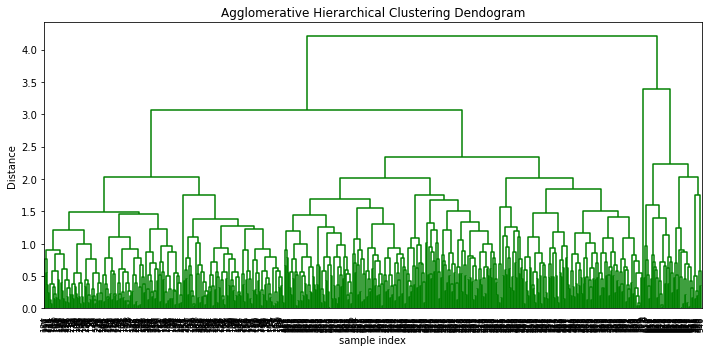

In [255]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [258]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(DF_z, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(DF_z))

c

0.7053536762972117

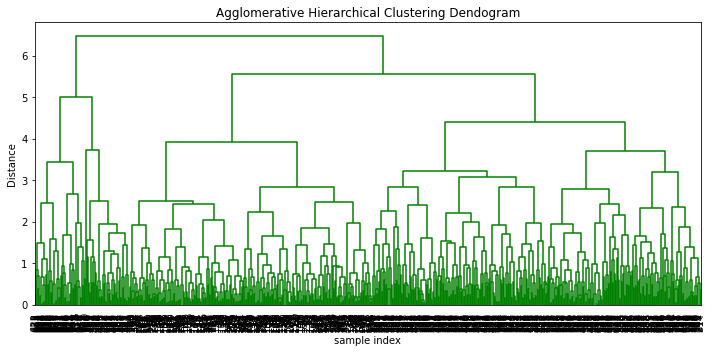

In [259]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [261]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(DF_z, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(DF_z))

c

0.6494724892190255

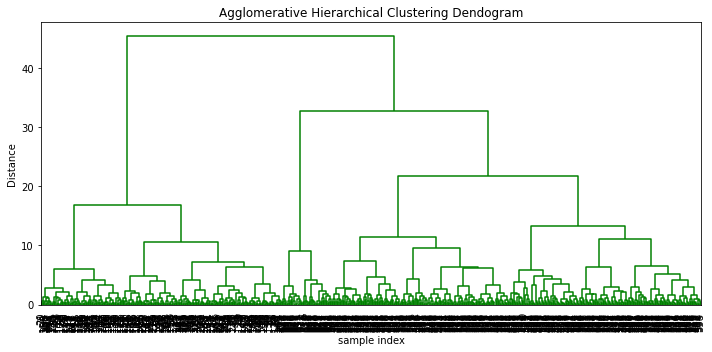

In [262]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [263]:
# Method Complete gives good score compare to method 'ward' and 'complete'

In [264]:
# There are total 3 segments of customers are there in this database.


In [265]:
# K Means Clustering explains well regarding 3 Different segements of customers compare to Hierarcial Clustering.

In [266]:
# Time complexity is less in K Means Clustering compare to Hierachial Clustering

In [267]:
# We can conclude that According to customers based on their spending patterns as well as past interaction with the bank.
# They can be divided into 3 different segements and K Means Clustering explains well in regards to 3 Segments.